In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
chars = list('abcdefghijklmnopqrstuvwxyz')
stoi = { s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = { i+1:s for i, s in enumerate(chars)}
itos[0] = '.'
print(stoi)
print(itos)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
len(words)

32033

In [65]:
block_size = 3
X, Y = [], []

for w in words:
#     print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
#         print(''.join(itos[i] for i in context), '->', ch)        
        context = context[1:] + [ix]
        
X = torch.tensor(X)    
Y = torch.tensor(Y)

In [108]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []

    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)    
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [12]:
C = torch.randn((27, 2))
C

tensor([[-1.4526, -2.0780],
        [ 0.2789,  0.1185],
        [-1.6498,  0.6196],
        [ 0.4546, -0.4112],
        [-0.7729, -0.4626],
        [-0.4445,  1.1777],
        [-0.6818, -2.3324],
        [ 0.7560, -0.3687],
        [ 1.3034, -0.9481],
        [ 2.4715, -1.1364],
        [ 0.8280, -1.4959],
        [-0.7690,  0.0836],
        [-0.9572,  0.1752],
        [ 0.3804, -1.5694],
        [ 0.1010, -0.7938],
        [-0.0820, -1.3379],
        [ 1.5952,  0.8336],
        [-0.3379,  1.2664],
        [ 1.0904, -0.2455],
        [ 0.9992,  0.3441],
        [ 1.2710, -0.2615],
        [ 0.8931,  0.8170],
        [-0.7789, -0.0620],
        [-0.2919, -0.3925],
        [-1.3689, -2.3951],
        [ 0.5192,  0.4173],
        [-1.2423, -0.4284]])

In [13]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [14]:
# WTF is being done here?
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [15]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [23]:
# emb @ W1 + b1
# (32 * 3 * 2) * (6 * 100) + (100)
# Implementation #1
torch.concat(torch.unbind(emb, 1), 1)

tensor([[-1.4526, -2.0780, -1.4526, -2.0780, -1.4526, -2.0780],
        [-1.4526, -2.0780, -1.4526, -2.0780, -0.4445,  1.1777],
        [-1.4526, -2.0780, -0.4445,  1.1777,  0.3804, -1.5694],
        [-0.4445,  1.1777,  0.3804, -1.5694,  0.3804, -1.5694],
        [ 0.3804, -1.5694,  0.3804, -1.5694,  0.2789,  0.1185],
        [-1.4526, -2.0780, -1.4526, -2.0780, -1.4526, -2.0780],
        [-1.4526, -2.0780, -1.4526, -2.0780, -0.0820, -1.3379],
        [-1.4526, -2.0780, -0.0820, -1.3379, -0.9572,  0.1752],
        [-0.0820, -1.3379, -0.9572,  0.1752,  2.4715, -1.1364],
        [-0.9572,  0.1752,  2.4715, -1.1364, -0.7789, -0.0620],
        [ 2.4715, -1.1364, -0.7789, -0.0620,  2.4715, -1.1364],
        [-0.7789, -0.0620,  2.4715, -1.1364,  0.2789,  0.1185],
        [-1.4526, -2.0780, -1.4526, -2.0780, -1.4526, -2.0780],
        [-1.4526, -2.0780, -1.4526, -2.0780,  0.2789,  0.1185],
        [-1.4526, -2.0780,  0.2789,  0.1185, -0.7789, -0.0620],
        [ 0.2789,  0.1185, -0.7789, -0.0

In [21]:
emb.view(32, 6)

tensor([[-1.4526, -2.0780, -1.4526, -2.0780, -1.4526, -2.0780],
        [-1.4526, -2.0780, -1.4526, -2.0780, -0.4445,  1.1777],
        [-1.4526, -2.0780, -0.4445,  1.1777,  0.3804, -1.5694],
        [-0.4445,  1.1777,  0.3804, -1.5694,  0.3804, -1.5694],
        [ 0.3804, -1.5694,  0.3804, -1.5694,  0.2789,  0.1185],
        [-1.4526, -2.0780, -1.4526, -2.0780, -1.4526, -2.0780],
        [-1.4526, -2.0780, -1.4526, -2.0780, -0.0820, -1.3379],
        [-1.4526, -2.0780, -0.0820, -1.3379, -0.9572,  0.1752],
        [-0.0820, -1.3379, -0.9572,  0.1752,  2.4715, -1.1364],
        [-0.9572,  0.1752,  2.4715, -1.1364, -0.7789, -0.0620],
        [ 2.4715, -1.1364, -0.7789, -0.0620,  2.4715, -1.1364],
        [-0.7789, -0.0620,  2.4715, -1.1364,  0.2789,  0.1185],
        [-1.4526, -2.0780, -1.4526, -2.0780, -1.4526, -2.0780],
        [-1.4526, -2.0780, -1.4526, -2.0780,  0.2789,  0.1185],
        [-1.4526, -2.0780,  0.2789,  0.1185, -0.7789, -0.0620],
        [ 0.2789,  0.1185, -0.7789, -0.0

In [25]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h.shape


torch.Size([32, 100])

In [26]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

logits = h @ W2 + b2
counts = logits.exp()
probs = counts / counts.sum(1, keepdim = True)

In [27]:
probs[0].sum()

tensor(1.0000)

In [34]:
loss = -prob[torch.arange(len(Y)), Y].log().mean()
loss

tensor(13.9879)

In [82]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lre

tensor([-3.0000, -2.9970, -2.9940, -2.9910, -2.9880, -2.9850, -2.9820, -2.9790,
        -2.9760, -2.9730, -2.9700, -2.9670, -2.9640, -2.9610, -2.9580, -2.9550,
        -2.9520, -2.9489, -2.9459, -2.9429, -2.9399, -2.9369, -2.9339, -2.9309,
        -2.9279, -2.9249, -2.9219, -2.9189, -2.9159, -2.9129, -2.9099, -2.9069,
        -2.9039, -2.9009, -2.8979, -2.8949, -2.8919, -2.8889, -2.8859, -2.8829,
        -2.8799, -2.8769, -2.8739, -2.8709, -2.8679, -2.8649, -2.8619, -2.8589,
        -2.8559, -2.8529, -2.8498, -2.8468, -2.8438, -2.8408, -2.8378, -2.8348,
        -2.8318, -2.8288, -2.8258, -2.8228, -2.8198, -2.8168, -2.8138, -2.8108,
        -2.8078, -2.8048, -2.8018, -2.7988, -2.7958, -2.7928, -2.7898, -2.7868,
        -2.7838, -2.7808, -2.7778, -2.7748, -2.7718, -2.7688, -2.7658, -2.7628,
        -2.7598, -2.7568, -2.7538, -2.7508, -2.7477, -2.7447, -2.7417, -2.7387,
        -2.7357, -2.7327, -2.7297, -2.7267, -2.7237, -2.7207, -2.7177, -2.7147,
        -2.7117, -2.7087, -2.7057, -2.70

In [163]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g, requires_grad=True)

W1 = torch.randn((30, 200), generator=g, requires_grad=True)
b1 = torch.randn(200, generator=g, requires_grad=True)

W2 = torch.randn((200, 27), generator=g, requires_grad=True)
b2 = torch.randn(27, generator=g, requires_grad=True)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True
print(sum(p.nelement() for p in parameters))

11897


In [164]:
lri = []
lossi = []
stepi = []

In [173]:
for k in range(50000):
    
    # minibatch
    ix = torch.randint(0, Xtr.shape[0], (32, ))
    
    # Forward pass
    emb = C[Xtr[ix]]
#     print(emb.shape)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
#     print(h.shape)
    logits = h @ W2 + b2
#     print(logits.shape)
#     counts = logits.exp()
#     print(counts.shape)
#     probs = counts / counts.sum(1, keepdim = True)
#     print(probs.shape)
#     loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())
    
    # Backprop
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update parameters
    for p in parameters:
        p.data += -0.01 * p.grad
        
#     lri.append(lre[k])
    stepi.append(k)
    lossi.append(loss.log10().item())
#     print(loss)
print(loss.item())

2.136420249938965


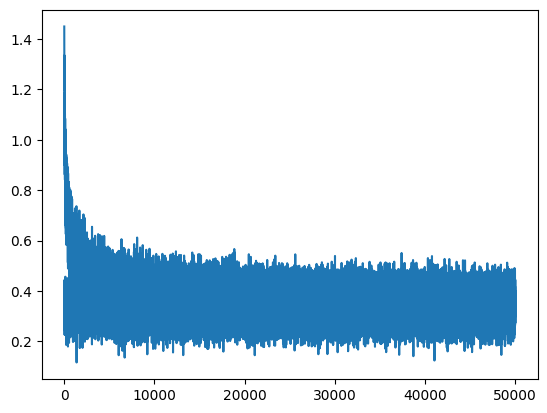

In [174]:
# print(lri)
# print(lossi)
plt.plot(stepi, lossi)

In [56]:
logits.max(1)

torch.return_types.max(
values=tensor([13.3437, 17.7880, 20.5833, 20.6041, 16.7390, 13.3437, 15.9748, 14.1889,
        15.9159, 18.3894, 15.9410, 20.9285, 13.3437, 17.1211, 17.1498, 20.0637,
        13.3437, 16.4564, 15.1328, 17.0536, 18.5906, 15.9655, 10.8739, 10.6875,
        15.5062, 13.3437, 16.2393, 16.9564, 12.7426, 16.2140, 19.0841, 16.0213],
       grad_fn=<MaxBackward0>),
indices=tensor([ 9, 13, 13,  1,  0,  9, 12,  9, 22,  9,  1,  0,  9, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0,  9, 15, 16,  8,  9,  1,  0]))

In [57]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [68]:
torch.randint(0, X.shape[0], (32, ))

tensor([183976, 122446,  24558, 134754, 112806,  15280, 173210,  49072,   1512,
        156601, 210354,  68730, 163357, 148520,  19579,  69234, 129225,  78204,
         89795, 111522, 174001, 211283, 129768,  75005,  66419, 198267,  48159,
        102015, 219239, 204099,  95848, 111431])

In [175]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.205702781677246


In [ ]:
# training split, dev / validation split, test split
# 80%, 10%, 10%
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

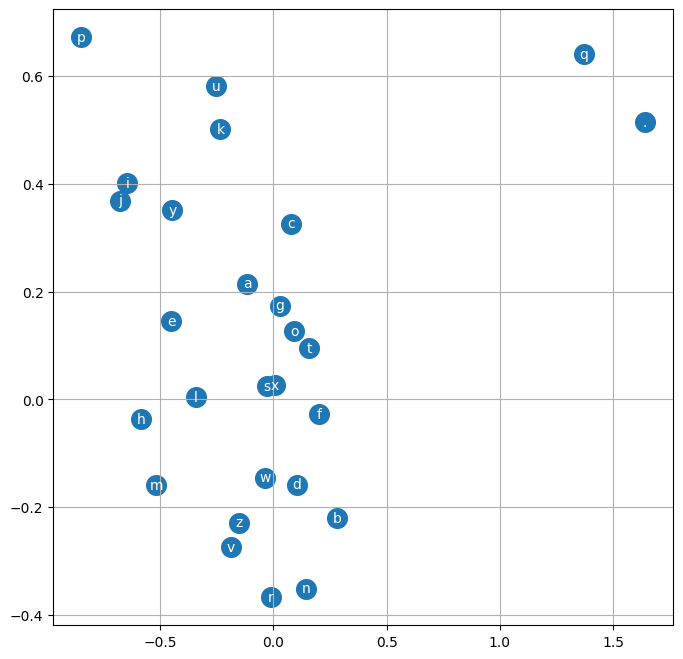

In [177]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s = 200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color = "white")
plt.grid("minor")

In [182]:
g = torch.Generator().manual_seed(2147483647 + 10)
for _ in range(20):
    out = []
    context = [0] * block_size

    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim = 1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
            
    print(''.join(itos[i] for i in out))

carpazratelle.
khi.
myli.
taty.
salaysa.
jazhets.
delynn.
jareei.
nellara.
chaiiv.
kaleigh.
ham.
joce.
quint.
saline.
liven.
arraelogierrynix.
kael.
druchus.
deco.
